In [1]:
#Jeff Practical Task 1
#focuses on demonstrating text preprocessing techniques using the NLTK (Natural Language Toolkit) library in Python. 
#The primary objective is to clean and prepare hotel review data from TripAdvisor for further analysis, such as sentiment analysis or topic modeling.
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import pandas as pd
import matplotlib.pyplot as pyt

In [2]:
data = pd.read_csv("z_files/90 - tripadvisor-hotel-reviews.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


# Text Preprocessing

In [4]:
data.Review[0]

'nice hotel. expensive parking. got good deal. stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [5]:
data["review_lowercase"] = data.Review.str.lower()

In [6]:
data.head()

,Review,Rating,review_lowercase
0,nice hotel. expensive parking. got good deal. ...,4,nice hotel. expensive parking. got good deal. ...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."


In [7]:
en_stopwords = stopwords.words("english")

In [8]:
en_stopwords.remove("not")

In [9]:
data["review_no_stopwords"] = data["review_lowercase"].apply(lambda x: " ".join(word for word in x.split() if word not in en_stopwords))

In [10]:
data.head()

,Review,Rating,review_lowercase,review_no_stopwords
0,nice hotel. expensive parking. got good deal. ...,4,nice hotel. expensive parking. got good deal. ...,nice hotel. expensive parking. got good deal. ...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [11]:
data["review_no_stopwords_no_punct"] = data.apply(lambda x: re.sub(r"[(*)]", " star", x["review_no_stopwords"]), axis=1)

In [12]:
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,nice hotel. expensive parking. got good deal. ...,4,nice hotel. expensive parking. got good deal. ...,nice hotel. expensive parking. got good deal. ...,nice hotel. expensive parking. got good deal. ...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 star experience hotel monaco ...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."


In [13]:
data["review_no_stopwords_no_punct"] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x["review_no_stopwords_no_punct"]), axis=1)

In [14]:
data.head()

,Review,Rating,review_lowercase,review_no_stopwords,review_no_stopwords_no_punct
0,nice hotel. expensive parking. got good deal. ...,4,nice hotel. expensive parking. got good deal. ...,nice hotel. expensive parking. got good deal. ...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 star experience hotel monaco ...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...


In [15]:
data["tokenized"] = data.apply(lambda x: word_tokenize(x["review_no_stopwords_no_punct"]), axis=1)
# reduces each word in the 'review no stopwords no punct' into individual tokens (words)

In [16]:
data.tokenized[0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'nonexistent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [17]:
ps = PorterStemmer()

In [18]:
data["stemmer"] = data["tokenized"].apply(lambda tokens: [ps.stem(token) for token in tokens])

In [19]:
data.stemmer[0]

['nice',
 'hotel',
 'expens',
 'park',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversari',
 'arriv',
 'late',
 'even',
 'took',
 'advic',
 'previou',
 'review',
 'valet',
 'park',
 'check',
 'quick',
 'easi',
 'littl',
 'disappoint',
 'nonexist',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfort',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillow',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morn',
 'loud',
 'bang',
 'door',
 'open',
 'close',
 'hear',
 'peopl',
 'talk',
 'hallway',
 'mayb',
 'noisi',
 'neighbor',
 'aveda',
 'bath',
 'product',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantag',
 'stay',
 'longer',
 'locat',
 'great',
 'walk',
 'distanc',
 'shop',
 'overal',
 'nice',
 'experi',
 'pay',
 '40',
 'park',
 'night']

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
data["lemmatized"] = data["tokenized"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [22]:
data.lemmatized[0]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'review',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'nonexistent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillow',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bang',
 'door',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbor',
 'aveda',
 'bath',
 'product',
 'nice',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [23]:
tokens_clean = sum(data.lemmatized, [])

In [24]:
unigrams = pd.Series(nltk.ngrams(tokens_clean, 1)).value_counts()
print(unigrams[:10])

(hotel,)       292
(room,)        275
(great,)       126
(not,)         122
(stay,)         95
(staff,)        90
(nt,)           81
(seattle,)      79
(location,)     78
(good,)         76
Name: count, dtype: int64


In [25]:
bigrams = pd.Series(nltk.ngrams(tokens_clean, 2)).value_counts()
print(bigrams[:10])
# collect the top 10 bigrams

(great, location)      24
(space, needle)        21
(hotel, monaco)        16
(great, view)          12
(staff, friendly)      12
(great, hotel)         12
(pike, place)          12
(location, great)      10
(walking, distance)    10
(king, bed)             9
Name: count, dtype: int64


## Matplotlib

Text(0.5, 1.0, '20 most frequently Occurring Bigrams')

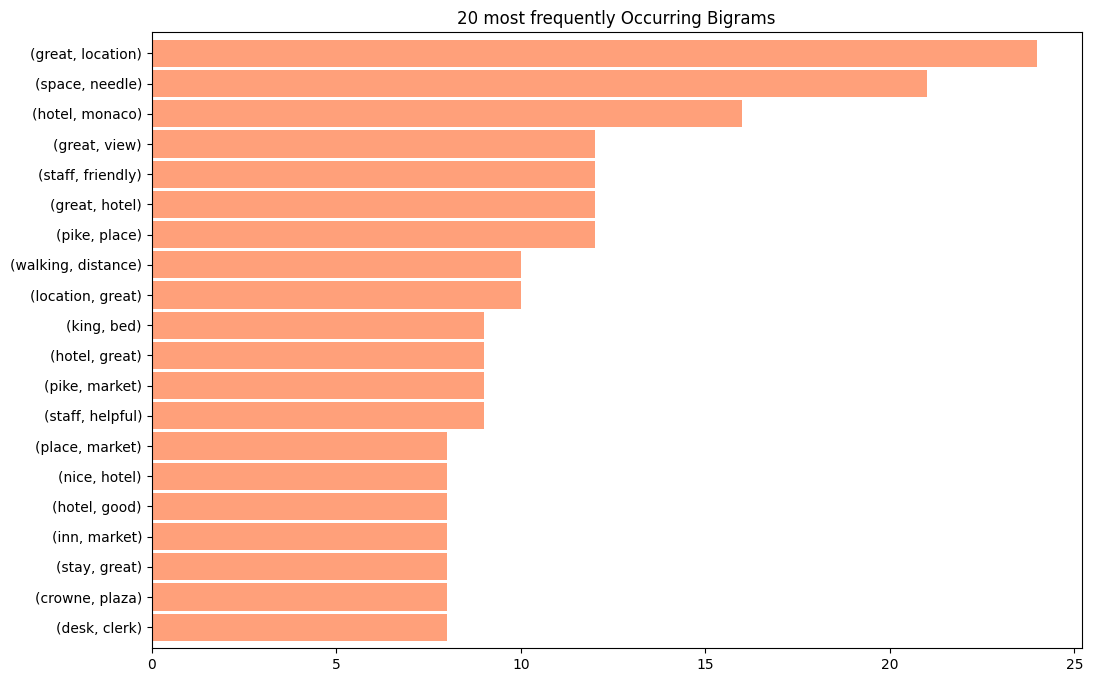

In [26]:
bigrams[:20].sort_values().plot.barh(color= "lightsalmon", width=.9, figsize=(12, 8))
pyt.title("20 most frequently Occurring Bigrams")
#plots the graph